<a href="https://www.kaggle.com/code/stukst/movie-genre-classification?scriptVersionId=218786885" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/description.txt
/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data_solution.txt
/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data.txt
/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt


# Step1: **Import Necessary Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve, precision_score, precision_recall_curve, precision_recall_fscore_support
from sklearn.preprocessing import label_binarize

# Step2: **Load the Dataset**

In [3]:
train_data = pd.read_csv('/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt', sep=' ::: ', engine='python', header=None)
test_data = pd.read_csv('/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data.txt', sep=' ::: ', engine='python', header=None)
test_data_solution = pd.read_csv('/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data_solution.txt', sep=' ::: ', engine='python', header=None)
# print(test_data)
train_data.head()

,0,1,2,3
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


# Step3: **Preprocess the Data**

*1. Convert text data to numerical features, using **TF-IDF***

TF-IDF stands for Term Frequency-Inverse Document Frequency. It's a technique used to convert text data into numerical features. TF-IDF takes into account:

* Term Frequency (TF): How often a word appears in a document.
* Inverse Document Frequency (IDF): How rare a word is across the entire corpus.

Since the machine won't be able to understand text data, we need to convert them into numerical features.

### Defining column indices

In [4]:
train_title = train_data.iloc[:,1]
train_genre = train_data.iloc[:,2]
train_description = train_data.iloc[:,3]

test_title = test_data.iloc[:,1]
test_description = test_data.iloc[:,2]
# train_title.head()

train_text_features = train_title + ' ' + train_description
test_text_features = test_title + ' ' + test_description

### Create a TF-IDF vectorizer

In [5]:
# vectorizer = TfidfVectorizer(stop_words='english')
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)    # TO limit the no. of features, to sace computation time. Since Logistice Regretion takes longer time (since, iterative)

### Fit the vectorizer to the text features and transform the data

In [6]:
x_train = vectorizer.fit_transform(train_text_features)
# print(x_train)
y_train = train_genre

x_test = vectorizer.transform(test_text_features)

# Step4: **Split the Data into Training and Testing Sets**

We don't need to split the data into training and testing set since it is already done. 

# Step5: **Train a Naive Bayes Classifier**

A probabilistic classification algorithm based on Bayes’ Theorem, which assumes that the features are conditionally independent of each other given the class label.

> Efficient for hight-dimensional data (ex: text classification).

***MultinomialNB***: Multinomial Naive Bayes - Classifier
Implements Multinomial Naive Bayes Algorithm.

In [7]:
# using training data
clf = MultinomialNB()   # object clf created of the Class MultinomialNB() - (in scikit-learn)
clf.fit(x_train, y_train)    # fit method is called/used using clf obj.

MultinomialNB()


* *clf:* An instance which will be used to train the model.
* *fit:* A method that trains the model using the provided data.
* **x_train** is the feature matrix (*independent variables*) for the training data.
* **y_train** is the target vector (*dependent variable*) for the training data.


#### The above code snippet creates a Multinomial Naive Bayes classifier and trains it using the training data (X_train and y_train). The trained model can then be used to make predictions on new, unseen data.

# Step6 : **Evaluate the Model**

In [8]:
test_genre = test_data_solution.iloc[:,2]
y_test = test_genre

In [9]:
# using test data
y_pred = clf.predict(x_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: ")
print(classification_report(y_test, y_pred, zero_division=0))
print("Precision: ", precision_score(y_test, y_pred, average='macro', zero_division=0))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))

Accuracy:  0.5257564575645757
Classification Report: 
              precision    recall  f1-score   support

      action       0.59      0.12      0.20      1314
       adult       0.51      0.06      0.11       590
   adventure       0.75      0.07      0.13       775
   animation       0.00      0.00      0.00       498
   biography       0.00      0.00      0.00       264
      comedy       0.52      0.42      0.47      7446
       crime       0.00      0.00      0.00       505
 documentary       0.57      0.88      0.69     13096
       drama       0.46      0.83      0.59     13612
      family       0.67      0.00      0.01       783
     fantasy       0.00      0.00      0.00       322
   game-show       0.98      0.32      0.48       193
     history       0.00      0.00      0.00       243
      horror       0.70      0.37      0.49      2204
       music       0.78      0.14      0.23       731
     musical       0.00      0.00      0.00       276
     mystery       0.00    

# Step7: Visualize

## Confusion Matrix Heatmap

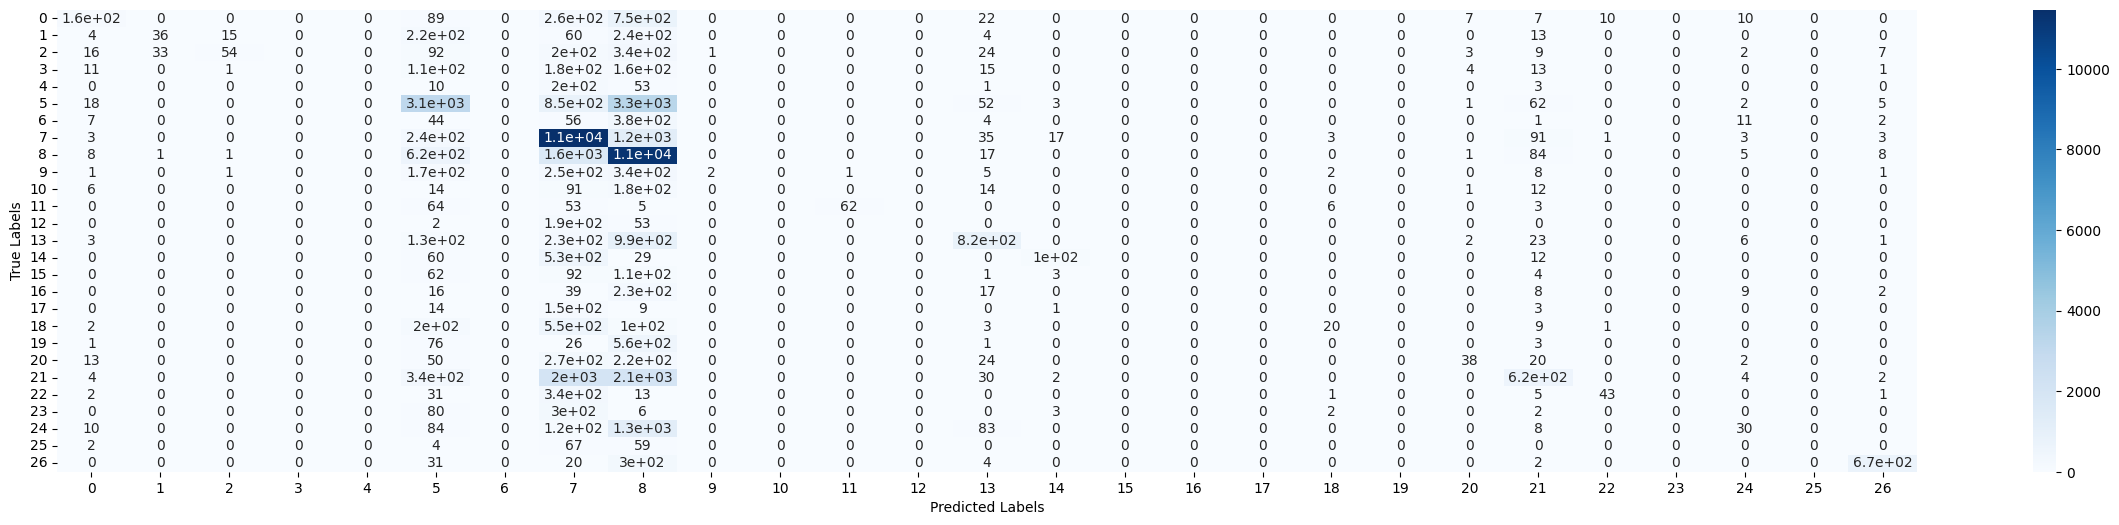

In [10]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(30,6))

sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Classification Report bar Chart

In [11]:
report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
plt.figure(figsize=(8,6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

### Extract the f1-score for each class

In [12]:
f1_scores = [report[x]["f1-score"] for x in report.keys() if x != "accuracy" and x != "macro avg" and x != "weighted avg"]

### Extract the corresponding class labels

In [13]:
class_labels = [x for x in report.keys() if x != "accuracy" and x != "macro avg" and x != "weighted avg"]

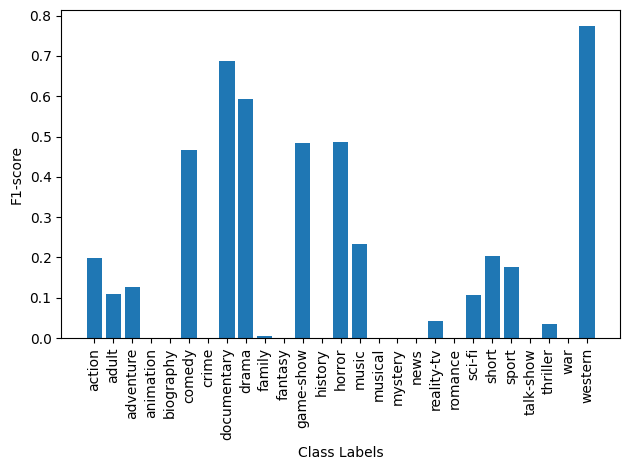

In [14]:
plt.bar(class_labels, f1_scores)
plt.xlabel("Class Labels")
plt.ylabel("F1-score")
plt.xticks(rotation=90)    # rotates the x-axis labels for better readability
plt.tight_layout()    # Adjust the layout to fit the labels
plt.show()

## Precision-Recall Curve

#### Binarize the multiclass labels

In [15]:
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
y_pred_proba = clf.predict_proba(x_test)

#### Calculate the precision and recall at different thresholds

In [16]:
precision, recall, thresholds = precision_recall_curve(y_test_binarized[:, 0], y_pred_proba[:, 0])

#### Plot the precision-recall curve

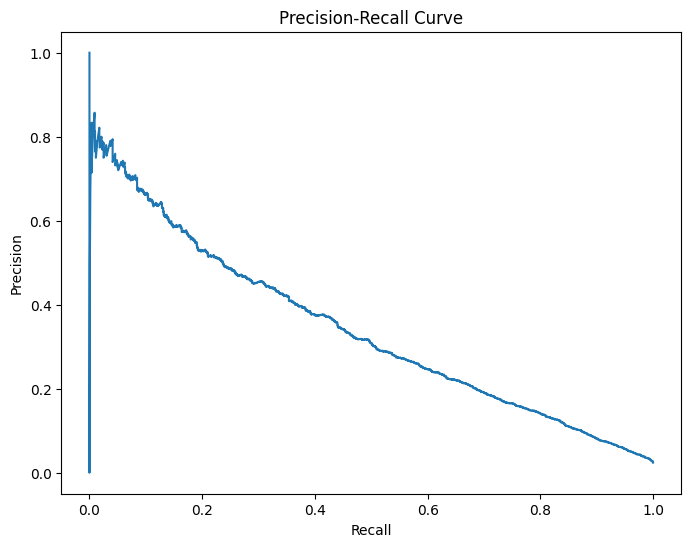

In [17]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

#### Count the number of samples in each class

In [18]:
class_counts = y_test.value_counts()

#### Plot a pie chart

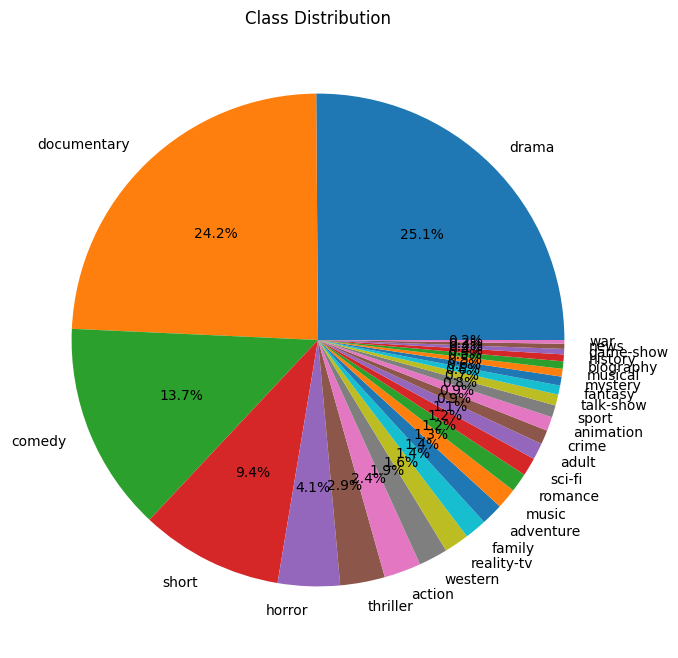

In [19]:
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Class Distribution')
plt.show()

**Zoomin the Graph**

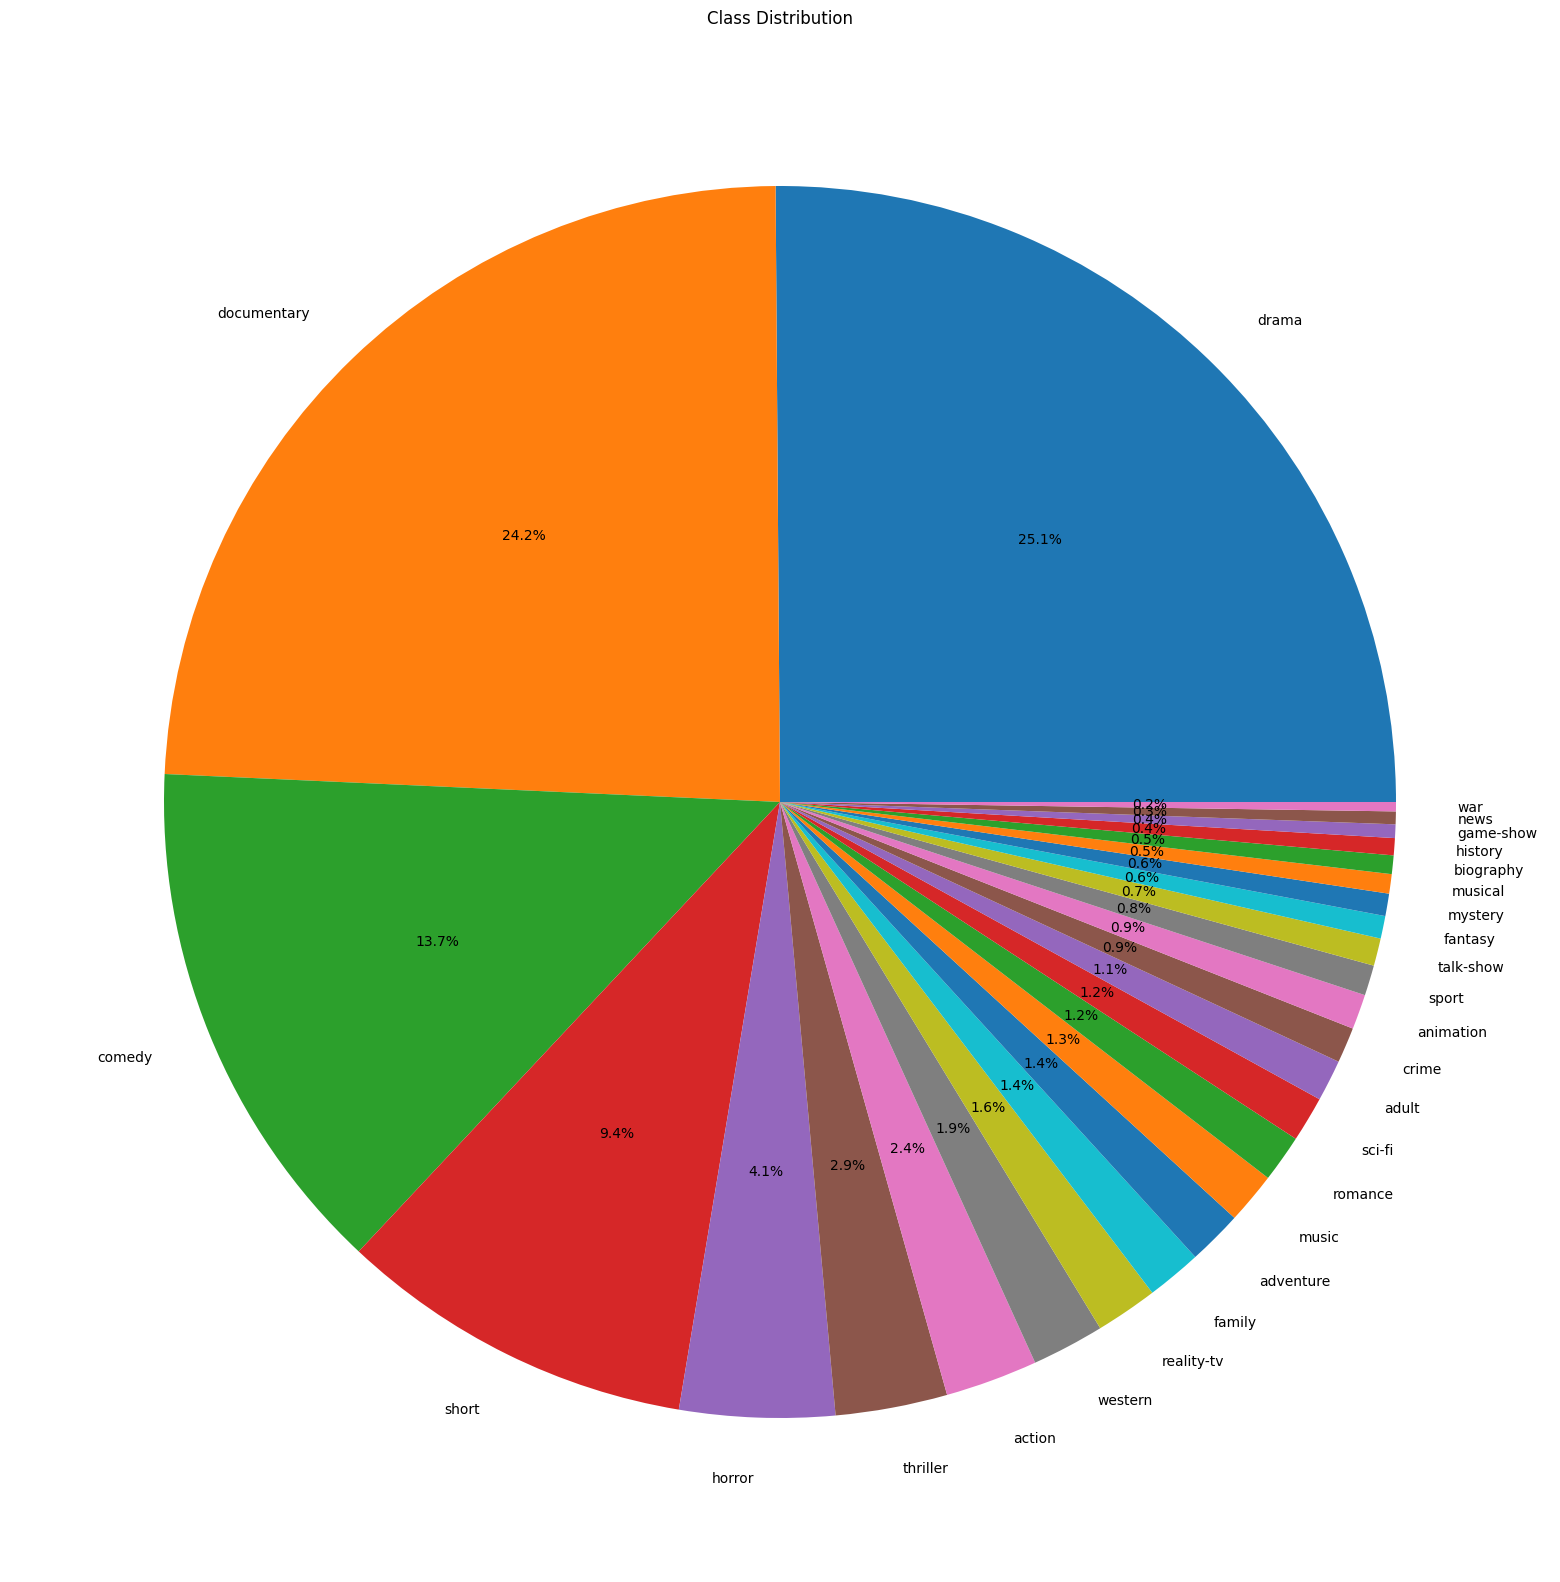

In [20]:
plt.figure(figsize=(20, 20))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Class Distribution')
plt.show()

# Logistic Regression

A statistical method used to analyze a dataset with independent variables to determine a binary outcome.

> Used for Predicting and, Classifying Data.
> Predicts binary outcome (e.g., yes or no).

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [22]:
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(x_train, y_train)
y_pred_logreg = logreg.predict(x_test)

print("Accuracy: ", accuracy_score(y_test, y_pred_logreg))
print("Classification Report: ")
print(classification_report(y_test, y_pred_logreg, zero_division=0))
print("Precision: ", precision_score(y_test, y_pred_logreg, average='macro', zero_division=0))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred_logreg))

Accuracy:  0.5893911439114391
Classification Report: 
              precision    recall  f1-score   support

      action       0.48      0.29      0.36      1314
       adult       0.61      0.24      0.34       590
   adventure       0.61      0.18      0.28       775
   animation       0.52      0.07      0.13       498
   biography       0.00      0.00      0.00       264
      comedy       0.54      0.58      0.56      7446
       crime       0.36      0.04      0.07       505
 documentary       0.67      0.85      0.75     13096
       drama       0.55      0.77      0.64     13612
      family       0.50      0.10      0.16       783
     fantasy       0.58      0.06      0.11       322
   game-show       0.87      0.50      0.64       193
     history       0.00      0.00      0.00       243
      horror       0.65      0.58      0.61      2204
       music       0.68      0.46      0.55       731
     musical       0.33      0.02      0.04       276
     mystery       0.33    

# SVM 
##### (Support Vector Machines)

A **Supervised** Machine Learning ALgorithm used for both *Classification* and *Regression* tasks.

> **Note:** SVMs can handle both *linear and nonlinear* data by using different *kernel functions* to transform data into higher-dimensional spaces (where it is easier to find a clear boundary between classes).

In [23]:
from sklearn.svm import LinearSVC

In [24]:
svm = LinearSVC(C=1)
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)

print("Accuracy: ", accuracy_score(y_test, y_pred_svm))
print("Classification Report: ")
print(classification_report(y_test, y_pred_svm, zero_division=0))
print("Precision: ", precision_score(y_test, y_pred_svm, average='macro', zero_division=0))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred_svm))

Accuracy:  0.5792619926199262
Classification Report: 
              precision    recall  f1-score   support

      action       0.39      0.32      0.35      1314
       adult       0.52      0.38      0.44       590
   adventure       0.41      0.22      0.29       775
   animation       0.30      0.14      0.19       498
   biography       0.06      0.00      0.01       264
      comedy       0.54      0.56      0.55      7446
       crime       0.21      0.07      0.11       505
 documentary       0.69      0.82      0.75     13096
       drama       0.57      0.72      0.63     13612
      family       0.32      0.13      0.19       783
     fantasy       0.29      0.11      0.16       322
   game-show       0.79      0.60      0.68       193
     history       0.19      0.02      0.04       243
      horror       0.59      0.61      0.60      2204
       music       0.60      0.51      0.55       731
     musical       0.25      0.08      0.12       276
     mystery       0.29    